In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Preparation

### 1. Original Data

In [4]:
patients = pd.read_excel('Covid19_SourceFile.xlsx')
taxonomytree = pd.ExcelFile('ICD10_Dx_TaxonomyTree.xlsx')
diagnosis = taxonomytree.parse(taxonomytree.sheet_names[0])
code = taxonomytree.parse(taxonomytree.sheet_names[1])  # read a specific sheet to DataFrame

# Prepare maps
age_code = code.iloc[0:16,3:6]
age_code.columns = age_code.iloc[0]
age_code.drop(age_code.index[0], inplace = True)
age_map = {row[0]: row[2] for index, row in age_code.iterrows()}
sex_map = {1: 'Male', 2:'Female'}
#age_code['mean_age'] = np.nan
#age_code['mean_age'][1:13] = age_code['AgeGroup'][1:13].apply(lambda x: np.array(x.split('-'), dtype='float').mean())
# Map Age and Sex variables 
patients['AgeCode'] = patients['AgeCode'].map(age_map)
patients['SexCode'] = patients['SexCode'].map(sex_map)
patients = patients.loc[patients.SexCode.notna()]
patients.rename(columns={'Mortality (1= death)':'death'}, inplace=True)
patients['num_diseases'] = patients.iloc[:, 3:23].notna().sum(axis=1)
patients.head()

,Patient ID,AgeCode,SexCode,DX1,DX2,DX3,DX4,DX5,DX6,DX7,...,DX12,DX13,DX14,DX15,DX16,DX17,DX18,DX19,DX20,death
0,1,Age_70_74,Female,L600,J45909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,Age_60_69,Female,Z86010,K5730,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,Age_60_69,Female,Z1211,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,Age_50_59,Male,Z1211,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,Age_70_74,Female,Z1211,I4901,Z95810,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 2. Dummies Data

In [6]:
patients_dummies = pd.read_csv('patients_clean_new.csv')
patients_dummies.rename(columns={'Mortality (1= death)':'death'}, inplace=True)
patients_dummies.head()

,Patient ID,death,BEHAV_AdjustmentStress,BEHAV_Affective_A,BEHAV_Affective_B,BEHAV_Anxiety_Phobia,BEHAV_Ocd_Adhd,BEHAV_Other_Nos_A,BEHAV_Other_Nos_B,BEHAV_Personality_Conduct,...,UROLG_GEN_Status_A,UROLG_GEN_Status_B,Undefined_Undefined,AgeCode_Age_18_39,AgeCode_Age_40_49,AgeCode_Age_50_59,AgeCode_Age_60_69,AgeCode_Age_70_74,AgeCode_Age_75_99,SexCode_Male
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,1
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0


In [7]:
important_features = 'CVASC_Cardiac_B,ENDOC_MET_Diabetes,CVASC_Other_Nos_B,CVASC_Heart_Rhythm_A,CHEST_Airway_Lungs_A,CVASC_Other_Nos_A,ENDOC_MET_Metabolic_A,CVASC_Cardiac_A,AgeCode_Age_75_99,CHEST_Other_Nos_B,CHEST_Status_A,CVASC_Arterial_A,UROLG_GEN_Other_Nos_B,GENRL_UNSP_Other_Nos_B,CHEST_Other_Nos_A,SexCode_Male,GENRL_UNSP_Service'.split(',')
important_features

['CVASC_Cardiac_B',
 'ENDOC_MET_Diabetes',
 'CVASC_Other_Nos_B',
 'CVASC_Heart_Rhythm_A',
 'CHEST_Airway_Lungs_A',
 'CVASC_Other_Nos_A',
 'ENDOC_MET_Metabolic_A',
 'CVASC_Cardiac_A',
 'AgeCode_Age_75_99',
 'CHEST_Other_Nos_B',
 'CHEST_Status_A',
 'CVASC_Arterial_A',
 'UROLG_GEN_Other_Nos_B',
 'GENRL_UNSP_Other_Nos_B',
 'CHEST_Other_Nos_A',
 'SexCode_Male',
 'GENRL_UNSP_Service']

# Exploratory Analysis

In [1]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [8]:
death_num = patients['death'].value_counts().reset_index()
death_num['proportion'] = round((death_num['death']/sum(death_num['death']))*100).astype('int')
death_num

,index,death,proportion
0,0,349352,94
1,1,21270,6


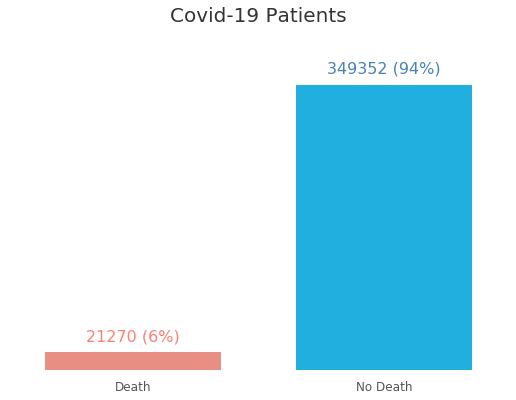

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=[9,6], facecolor='w')
g = sns.barplot(x='index', y='death',
                data=death_num,
                palette=['salmon','deepskyblue'],
                order=[1,0])
plt.xlabel('')
plt.ylabel('')
g.set_facecolor('white')
g.set_yticklabels([])
g.set_xticklabels(['Death', 'No Death'], fontsize=12)
g.tick_params(axis='both', which='both', length=0, pad=10)
plt.ylim(0,40e04)
plt.title('Covid-19 Patients', fontsize=20, y=1.05, color='#353333')
plt.text(0, death_num.iloc[1,1]+15000,str(death_num.iloc[1,1])+' ('+str(death_num.iloc[1,2])+'%)' , color='salmon', fontsize=16, ha='center')
plt.text(1, death_num.iloc[0,1]+15000,str(death_num.iloc[0,1])+' ('+str(death_num.iloc[0,2])+'%)' , color='steelblue', fontsize=16, ha='center')
change_width(g, .7)
plt.savefig('The Number of Classes for the Mortality variable', facecolor='white')

In [10]:
age_order = [sorted(patients['AgeCode'].unique())[-1]] + sorted(patients['AgeCode'].unique())[:6]
death_by_age = (patients.groupby('AgeCode')['death'].mean().round(4)*100).loc[age_order].reset_index()
death_by_age

,AgeCode,death
0,RefUnder18,0.52
1,Age_18_39,0.78
2,Age_40_49,2.42
3,Age_50_59,4.74
4,Age_60_69,7.71
5,Age_70_74,11.40
6,Age_75_99,19.50


In [29]:
from scipy import stats
chi2, p, dof, ex = stats.chi2_contingency(freq_death_by_ndrg, correction=False)
print('--Chi-Squared Test for N_diseases and Mortality--')
print('chi-square = ', round(chi2,2)) 
print('df = ', dof)  
print('p-value', p)    

--Chi-Squared Test for N_diseases and Mortality--
chi-square =  154304.33
df =  20
p-value 0.0


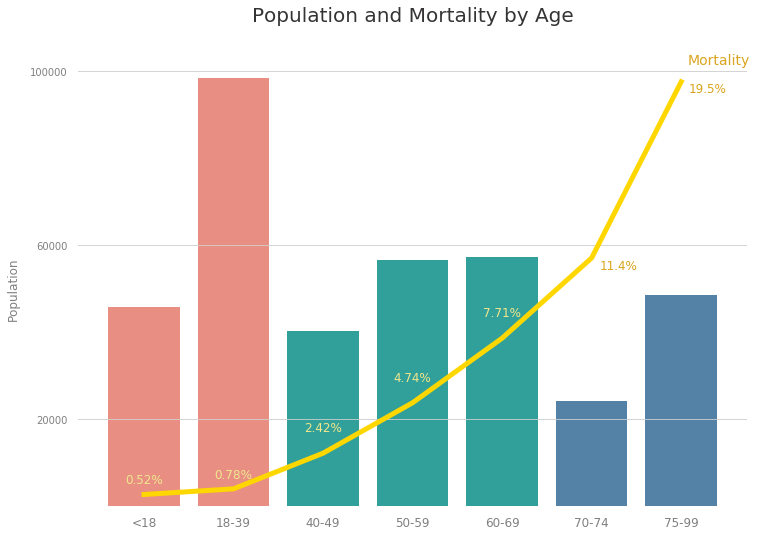

In [67]:
age_labels = [label.replace('Age_', '').replace('_', '-').replace('RefUnder18', '<18') for label in age_order]
young, middle, old = 'salmon','lightseagreen','steelblue'
age_colors = [young, young, middle, middle, middle, old, old]

plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=[12,8], facecolor='white')
ax2 = ax1.twinx()
sns.countplot(x='AgeCode', orient='v', palette=age_colors, data=patients, ax=ax1, order=age_order,)
sns.lineplot(x='AgeCode', y='death', data=death_by_age, ax=ax2, sort=False, linewidth=5, color='gold')

ax1.set_facecolor('white')
ax1.set_xlabel('')
ax1.set_ylabel('Population', color='grey', labelpad=10)
ax1.set_yticks(np.arange(20000, 100001, 40000))
ax1.set_ylim(0,10e04)
ax1.set_xticklabels(age_labels, fontsize=12, color='grey')
ax1.set_yticklabels(np.arange(20000, 100001, 40000), color='grey')
ax2.set_ylim(0,20)
ax2.set_yticks(np.array([4,12,20]))
ax2.set_yticklabels([])
ax2.set_ylabel('')

for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0, pad=10)
    ax.grid(color='lightgrey', which='major', axis='y')

for index, row in death_by_age.iterrows():
    if row['death']<2:
        plt.text(index, row['death']+0.5, str(round(row['death'],2))+'%', color='khaki', fontsize=12, horizontalalignment='center')
    elif row['death']<10:
        plt.text(index, row['death']+1, str(round(row['death'],2))+'%', color='khaki', fontsize=12, horizontalalignment='center')
    else:
        plt.text(index+0.3, row['death']-0.5, str(round(row['death'],2))+'%', color='goldenrod', fontsize=12, horizontalalignment='center')
plt.text(len(death_by_age)-0.58, death_by_age.iloc[-1,1]+0.8, 'Mortality', color='goldenrod', fontsize=14, horizontalalignment='center')
plt.title('Population and Mortality by Age', y=1.1, fontsize=20, color='#353333')
plt.show()
#plt.savefig('Population and Mortality by Age.png', facecolor='white')

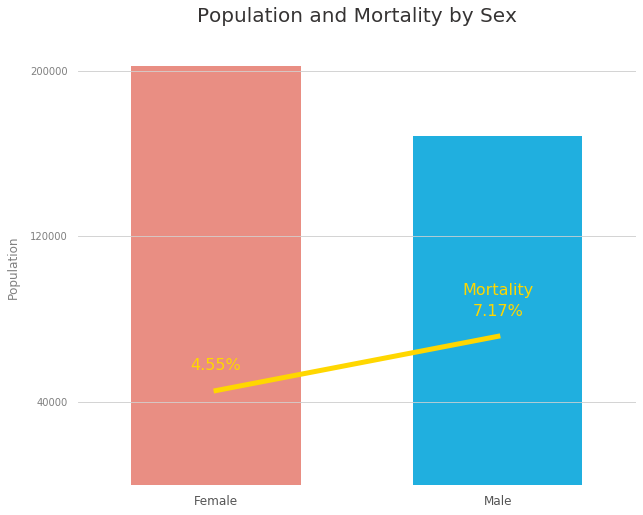

In [20]:
fig, ax1 = plt.subplots(figsize=[10,8])
ax1.set_facecolor('white')

ax1 = sns.countplot(x='SexCode', orient='v', palette=['salmon','deepskyblue'],data=patients)
ax2 = ax1.twinx()
sns.lineplot(x='SexCode', y='death', data=death_by_sex, sort=False, linewidth=5, color='gold')

ax1.set_xlabel('')
ax1.set_ylabel('Population', color='grey', labelpad=10)
ax1.set_yticks(np.arange(40000, 240001, 80000))
ax1.set_yticklabels(np.arange(40000, 200001, 80000), color='grey')
ax1.yaxis.grid(True, color='lightgrey') 
ax1.set_ylim(0,21e04)
ax1.set_xticklabels(['Female', 'Male'], fontsize=12)


ax2.set_ylim(0,21)
ax2.set_yticks(np.array([4,12,20]))
ax2.set_yticklabels([])
ax2.set_ylabel('')

for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0, pad=10)
    ax.grid(color='lightgrey', which='major', axis='y')

for index, row in death_by_sex.iterrows():
    plt.text(index, row['death']+1, str(round(row['death'],2))+'%', color='gold', fontsize=16, horizontalalignment='center')
plt.text(len(death_by_sex)-1, death_by_sex.iloc[-1,1]+2, 'Mortality', color='gold', fontsize=16, horizontalalignment='center')
plt.title('Population and Mortality by Sex', y=1.05, fontsize=20, color='#353333')
change_width(ax1, 0.6)

plt.savefig('Population and Mortality by Sex.png', facecolor='white')

In [22]:
num_diseases_by_patients = patients.groupby('AgeCode')[['death','num_diseases']].mean().reset_index()
num_diseases_by_patients = num_diseases_by_patients.iloc[[6,0,1,2,3,4,5]].reset_index().drop(columns='index')
num_diseases_by_patients

,AgeCode,death,num_diseases
0,RefUnder18,0.005187,1.968136
1,Age_18_39,0.007798,2.487190
2,Age_40_49,0.024239,3.070125
3,Age_50_59,0.047399,3.364926
4,Age_60_69,0.077147,3.532527
5,Age_70_74,0.113961,3.580132
6,Age_75_99,0.194997,3.921770


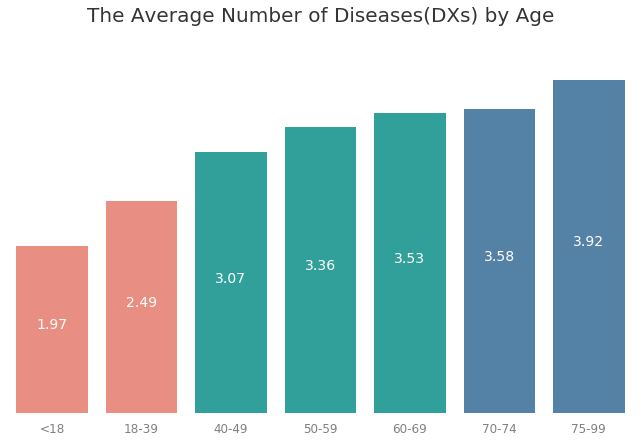

In [446]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=[10,6], facecolor='white')
ax1.set_facecolor('white')
ax1 = sns.barplot(x='AgeCode', y='num_diseases', orient='v', palette=age_colors, data=num_diseases_by_patients, order=age_order)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='both', which='both', length=0, pad=10)
ax1.set_xticklabels(age_labels, fontsize=12, color='grey')

for index, row in num_diseases_by_patients.iterrows():
    ax1.text(index, row['num_diseases']*0.5, str(round(row['num_diseases'],2)), ha='center', color='white', fontsize=14)
plt.title('The Average Number of Diseases(DXs) by Age', y=1.1, fontsize=20, color='#353333')
plt.show()

#plt.savefig('The Average Number of Diseases(DXs) by Age.png', facecolor='white', bbox_inches="tight")

In [24]:
patients_by_numd = patients.groupby('num_diseases')['death'].mean().reset_index()
patients_by_numd

,num_diseases,death
0,0,0.010417
1,1,0.003498
2,2,0.003684
3,3,0.006773
4,4,0.018433
5,5,0.048660
6,6,0.095439
7,7,0.180922
8,8,0.284538
9,9,0.401635


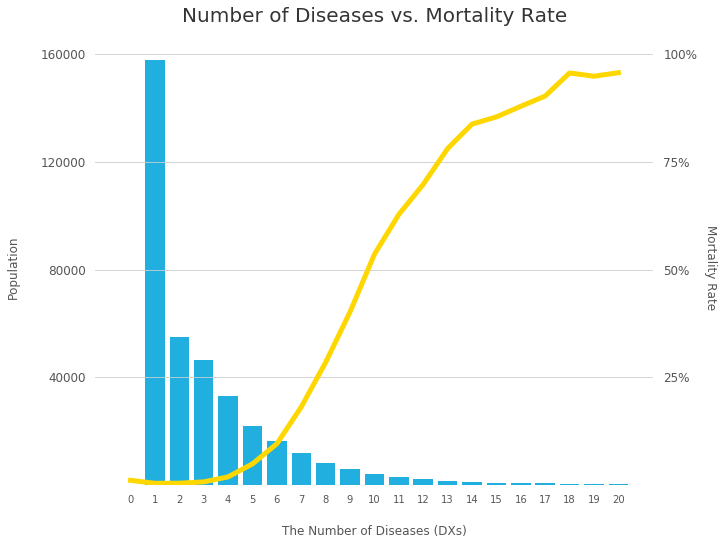

In [25]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=[10,8])
ax2 = ax1.twinx()
ax1.set_facecolor('white')
sns.countplot(patients['num_diseases'], color='deepskyblue', ax=ax1)
sns.lineplot(x='num_diseases', y='death', data=patients_by_numd, sort=False, ax=ax2, linewidth=5, color='gold')

ax1.set_ylabel('Population', labelpad=20, fontsize=12)
ax1.set_yticks(np.arange(40000,160001,40000))
ax1.set_yticklabels(np.arange(40000,160001,40000), fontsize=12)
ax1.set_ylim(0,161600)
ax1.set_xlabel('The Number of Diseases (DXs)', labelpad=20, fontsize=12)

ax2.set_ylabel('Mortality Rate', rotation=270, labelpad=20, fontsize=12)
ax2.set_yticks(np.arange(0.25,1.01,0.25))
ax2.set_yticklabels([str(i)+'%' for i in np.arange(25,101,25)], fontsize=12)
ax2.set_ylim(0,1.01)

for ax in [ax1,ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0, pad=10)
    ax.grid(color='lightgrey', which='major', axis='y')

plt.title('Number of Diseases vs. Mortality Rate', y=1.05, fontsize=20, color='#353333')

plt.show()
#plt.savefig('Diseases and Motality Rate.png', facecolor='white',bbox_inches="tight")

# Fisher's Test

In [28]:
from scipy.stats import fisher_exact
fisher_test = {'features':important_features, 'oddsratio':[], 'pvalue':[]}

for f in important_features:
    table = pd.crosstab(patients_dummies[f], patients_dummies['death'])
   # table = table.iloc[[1,0], [1,0]]
    oddsratio, pvalue = fisher_exact(np.matrix(table))
    fisher_test['oddsratio'].append(oddsratio)
    fisher_test['pvalue'].append(pvalue)
fisher_test = pd.DataFrame(fisher_test).sort_values('oddsratio', ascending=False).reset_index()
fisher_test

,index,features,oddsratio,pvalue
0,0,CVASC_Cardiac_B,63.793358,0.000000e+00
1,3,CVASC_Heart_Rhythm_A,20.767741,0.000000e+00
2,1,ENDOC_MET_Diabetes,18.245883,0.000000e+00
3,2,CVASC_Other_Nos_B,17.579508,0.000000e+00
4,11,CVASC_Arterial_A,17.231096,0.000000e+00
5,6,ENDOC_MET_Metabolic_A,14.741605,0.000000e+00
6,10,CHEST_Status_A,12.792660,0.000000e+00
7,16,GENRL_UNSP_Service,11.498339,0.000000e+00
8,7,CVASC_Cardiac_A,10.771574,0.000000e+00
9,12,UROLG_GEN_Other_Nos_B,9.360276,0.000000e+00


In [29]:
f = lambda x: 'dodgeblue' if x > 60 else ('lightskyblue' if x > 10 else 'lightblue')
fisher_test['colormap'] = fisher_test['oddsratio'].apply(f)
labels = [i.replace('_', '\n') for i in fisher_test['features'].values]
labels[10] = 'Age\n75-99'
labels[-1] = 'Sex\nMale'

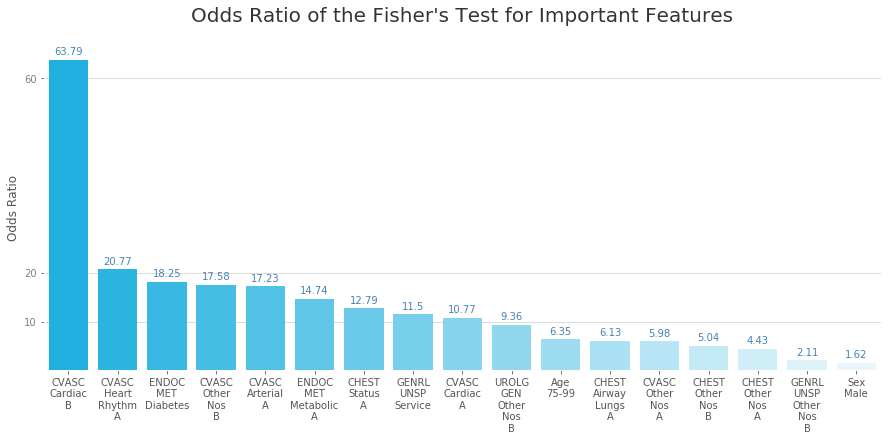

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=[15,6])
ax = sns.barplot(x='features', y='oddsratio', data=fisher_test, 
                 palette=sns.light_palette("deepskyblue",n_colors=len(fisher_test), reverse=True))
ax.set_facecolor('white')
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks([10,20,60])
ax.set_yticklabels([10,20,60], color='grey')
ax.set_xlabel('')
ax.set_ylabel('Odds Ratio')
ax.set_title("Odds Ratio of the Fisher's Test for Important Features", y=1.05, fontsize=20, color='#353333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='lightgrey', axis='y', which='major')

for index, row in fisher_test.iterrows():
    ax.text(index, row['oddsratio']+1, str(round(row['oddsratio'],2)), ha='center', color='steelblue')

plt.show()
#plt.savefig('Odds Ratio.png',bbox_inches="tight", facecolor='white')

In [33]:
death_diseases = patients_dummies.loc[patients_dummies.death==1].iloc[:, 2:223].sum(axis=0).sort_values(ascending=False)/patients_dummies.death.sum()
death_diseases = pd.DataFrame(death_diseases).reset_index().head(10)
death_diseases['no_death'] = patients_dummies.loc[patients_dummies.death==0, death_diseases['index'].values].mean(axis=0).values
death_diseases

,index,0,no_death
0,CVASC_Other_Nos_B,0.606770,0.080692
1,GENRL_UNSP_Other_Nos_A,0.596944,0.259890
2,CVASC_Cardiac_B,0.513493,0.016276
3,GENRL_UNSP_Service,0.491631,0.077581
4,ENDOC_MET_Metabolic_A,0.429008,0.048496
5,BEHAV_Substance_Abuse,0.404795,0.141184
6,ENDOC_MET_Diabetes,0.381758,0.032735
7,GENRL_UNSP_Other_Nos_B,0.333709,0.191595
8,CHEST_Airway_Lungs_A,0.304278,0.066612
9,CVASC_Heart_Rhythm_A,0.239022,0.014899


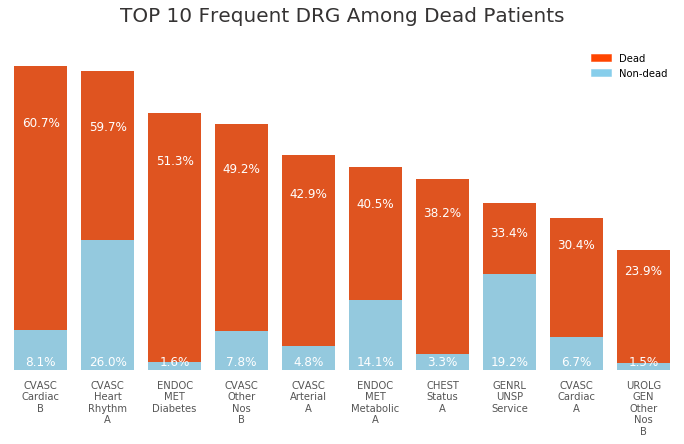

In [49]:
import matplotlib.patches as mpatches
plt.style.use('ggplot')
plt.figure(figsize=[12,6])
ax = sns.barplot(x='index', y=0, data=death_diseases,color='orangered') #palette=sns.light_palette("deepskyblue",n_colors=len(death_diseases), reverse=True))
sns.barplot(x='index', y='no_death', data=death_diseases, color='skyblue')#palette=sns.light_palette("orangered",n_colors=len(death_diseases), reverse=True))
#sns.light_palette("dodgerblue",n_colors=len(fisher_test), reverse=True)
ax.set_facecolor('white')
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_ylim(0,0.65)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0, pad=10)
ax.set_title("TOP 10 Frequent DRG Among Dead Patients", y=1.05, fontsize=20, color='#353333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(color='lightgrey', axis='y', which='major')
for index, row in death_diseases.iterrows():
    ax.text(index, row[0]*0.8, str(round(row[0]*100,1))+'%', ha='center', color='white', fontsize=12)
    ax.text(index, 0.01, str(round(row['no_death']*100,1))+'%', ha='center', color='white', fontsize=12)


red_patch = mpatches.Patch(color='orangered', label='Dead')
blue_patch = mpatches.Patch(color='skyblue', label='Non-dead')
plt.legend(handles=[red_patch, blue_patch], facecolor="white", edgecolor='white')
#plt.show()
plt.savefig('TOP 10 DRG.png', bbox_inches="tight", facecolor='white', dpi=150)

In [53]:
patients_dummies.columns[2:223]

Index(['BEHAV_AdjustmentStress', 'BEHAV_Affective_A', 'BEHAV_Affective_B',
       'BEHAV_Anxiety_Phobia', 'BEHAV_Ocd_Adhd', 'BEHAV_Other_Nos_A',
       'BEHAV_Other_Nos_B', 'BEHAV_Personality_Conduct', 'BEHAV_Psychosis',
       'BEHAV_Substance_Abuse',
       ...
       'UROLG_GEN_Other_Nos_A', 'UROLG_GEN_Other_Nos_B',
       'UROLG_GEN_Pers_Fam_Hx_Ds', 'UROLG_GEN_Screening', 'UROLG_GEN_Service',
       'UROLG_GEN_Sgn_Symp', 'UROLG_GEN_Status2', 'UROLG_GEN_Status_A',
       'UROLG_GEN_Status_B', 'Undefined_Undefined'],
      dtype='object', length=221)

In [62]:
top10odds = patients_dummies.iloc[:,1:223].groupby('death').mean().T
top10odds['odds'] = top20odds[1]/top20odds[0]
top10odds = top20odds.sort_values('odds',ascending=False).head(10).reset_index()
top10odds

death,level_0,index,0,1,odds
0,0,MGENT_Benign_B,0.000009,0.000423,49.273907
1,1,DERMA_Metastatic,0.000006,0.000188,32.849271
2,2,CVASC_Cardiac_B,0.016276,0.513493,31.549397
3,3,CVASC_Status_A,0.000750,0.022003,29.338662
4,4,CVASC_Status_B,0.000109,0.002586,23.772499
5,5,UROLG_GEN_Status_B,0.000956,0.018571,19.424345
6,6,ENDOC_MET_Metabolic_B,0.000398,0.006817,17.133613
7,7,MGENT_In_Situ_Uncertn_A,0.000003,0.000047,16.424636
8,8,CVASC_Complication_A,0.000043,0.000705,16.424636
9,9,CVASC_Arterial_A,0.003306,0.054067,16.353533


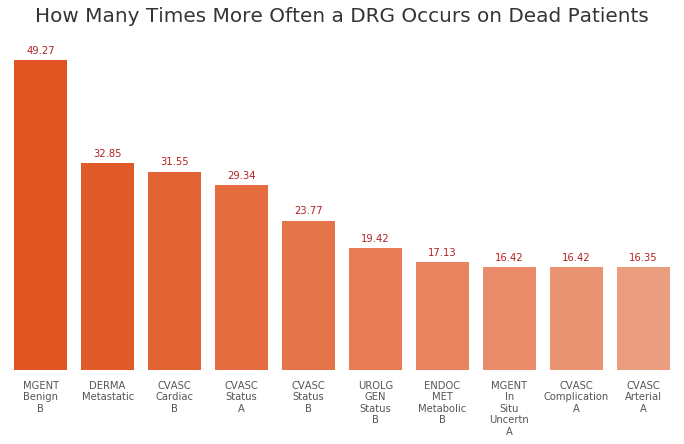

In [69]:
labels_odds = [i.replace('_', '\n') for i in top10odds['index'].values]
plt.style.use('ggplot')
plt.figure(figsize=[12,6])
ax = sns.barplot(x='index', y='odds', data=top10odds, palette=sns.light_palette("orangered",n_colors=20, reverse=True))
#sns.light_palette("dodgerblue",n_colors=len(fisher_test), reverse=True)
ax.set_facecolor('white')
ax.set_xticklabels(labels_odds, fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_title("How Many Times More Often a DRG Occurs on Dead Patients", y=1.05, fontsize=20, color='#353333')
ax.tick_params(axis='both', which='both', length=0, pad=10)
for index, row in top10odds.iterrows():
    ax.text(index, row['odds']+1, str(round(row['odds'],2)), ha='center', color='firebrick')
plt.show()
#plt.savefig('OddsRatio_TOP10.png',bbox_inches="tight", facecolor='white', dpi=150)